In [1]:
# Import the modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics, tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Display all of the columns
pd.set_option('display.max_columns', None)

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df_lending_data = pd.read_csv(Path("Resources/lending_data.csv"))

# Review the DataFrame
df_lending_data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700,7.672,52800,0.431818,5,1,22800,0
1,8400,6.692,43600,0.311927,3,0,13600,0
2,9000,6.963,46100,0.349241,3,0,16100,0
3,10700,7.664,52700,0.430740,5,1,22700,0
4,10800,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df_lending_data["loan_status"]

# Separate the X variable, the features
X = df_lending_data.drop(columns="loan_status")

In [4]:
# Review the y variable Series
print(f"Labels: {y[:10]}")

Labels: 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: loan_status, dtype: int64


In [5]:
# Review the X variable DataFrame
print(f"Data: {X[:10]}")

Data:    loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0      10700          7.672            52800        0.431818                5   
1       8400          6.692            43600        0.311927                3   
2       9000          6.963            46100        0.349241                3   
3      10700          7.664            52700        0.430740                5   
4      10800          7.698            53000        0.433962                5   
5      10100          7.438            50600        0.407115                4   
6      10300          7.490            51100        0.412916                4   
7       8800          6.857            45100        0.334812                3   
8       9300          7.096            47400        0.367089                3   
9       9700          7.248            48800        0.385246                4   

   derogatory_marks  total_debt  
0                 1       22800  
1                 0       13600  


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [6]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [7]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
classifier = LogisticRegression(solver='saga', random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

D:\Python_3116\py3116\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=1, solver='saga')

In [8]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9915738065758701
Testing Data Score: 0.9926227816756088


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
36831,0,0
75818,0,1
36563,0,0
13237,0,0
43292,0,0
...,...,...
38069,0,0
36892,0,0
5035,0,0
40821,0,0


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Generate a confusion matrix for the model
cm_LRM = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm_LRM, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
acc_score = accuracy_score(y_test, predictions)

In [11]:
# Print the classification report for the model
target_names = ["Healthy Loan", "High-risk Loan"]
print("Confusion Matrix_Logistic Regression Model")
display(cm_df)
print('Accuracy Score: %.3f' % classifier.score(X_test, y_test))
print("Classification Report for LRM")
print(classification_report(y_test, predictions, target_names=target_names))

Confusion Matrix_Logistic Regression Model


,Predicted 0,Predicted 1
Actual 0,18678,81
Actual 1,62,563


Accuracy Score: 0.993
Classification Report for LRM
                precision    recall  f1-score   support

  Healthy Loan       1.00      1.00      1.00     18759
High-risk Loan       0.87      0.90      0.89       625

      accuracy                           0.99     19384
     macro avg       0.94      0.95      0.94     19384
  weighted avg       0.99      0.99      0.99     19384


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:**  The model's accuracy is good a predicting if a loan will default because of the high accuracy and F-1 and recall scores. The accuracy seems to be good enough to start exploring this kind of algorithm in a bank.

## Create a Support Vector Machines Model with the Original Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
cm_SVM = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm_SVM, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
acc_score = accuracy_score(y_test, predictions)

In [14]:
target_names = ["Healthy Loan", "High-risk Loan"]
print("Confusion Matrix_SVM")
display(cm_df)
print('Accuracy Score: %.3f' % model.score(X_test, y_test))
print("Classification Report for SVM")
print(classification_report(y_test, predictions, target_names=target_names))

Confusion Matrix_SVM


,Predicted 0,Predicted 1
Actual 0,18674,110
Actual 1,17,583


Accuracy Score: 0.993
Classification Report for SVM
                precision    recall  f1-score   support

  Healthy Loan       1.00      0.99      1.00     18784
High-risk Loan       0.84      0.97      0.90       600

      accuracy                           0.99     19384
     macro avg       0.92      0.98      0.95     19384
  weighted avg       0.99      0.99      0.99     19384


## Create a Decision Trees Model with the Test and Train Data

In [15]:
model = tree.DecisionTreeClassifier()

In [16]:
model = model.fit(X_train, y_train)

In [17]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
cm_DTM = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm_DTM, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
acc_score = accuracy_score(y_test, predictions)

In [19]:
target_names = ["Healthy Loan", "High-risk Loan"]
print("Confusion Matrix_DTM")
display(cm_df)
print('Accuracy Score: %.3f' % model.score(X_test, y_test))
print("Classification Report for Decision Trees")
print(classification_report(y_test, predictions, target_names=target_names))

Confusion Matrix_DTM


,Predicted 0,Predicted 1
Actual 0,18692,92
Actual 1,103,497


Accuracy Score: 0.990
Classification Report for Decision Trees
                precision    recall  f1-score   support

  Healthy Loan       0.99      1.00      0.99     18784
High-risk Loan       0.84      0.83      0.84       600

      accuracy                           0.99     19384
     macro avg       0.92      0.91      0.92     19384
  weighted avg       0.99      0.99      0.99     19384


## Create a Random Forest Model with the Test and Train Data

In [20]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [21]:
rf_model = rf_model.fit(X_train, y_train)

In [22]:
predictions = rf_model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
cm_RF = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm_RF, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
acc_score = accuracy_score(y_test, predictions)

In [24]:
target_names = ["Healthy Loan", "High-risk Loan"]
print("Confusion Matrix_RandomForest")
display(cm_df)
print('Accuracy Score: %.3f' % model.score(X_test, y_test))
print("Classification Report for Random Forests")
print(classification_report(y_test, predictions, target_names=target_names))

Confusion Matrix_RandomForest


,Predicted 0,Predicted 1
Actual 0,18690,94
Actual 1,68,532


Accuracy Score: 0.990
Classification Report for Random Forests
                precision    recall  f1-score   support

  Healthy Loan       1.00      0.99      1.00     18784
High-risk Loan       0.85      0.89      0.87       600

      accuracy                           0.99     19384
     macro avg       0.92      0.94      0.93     19384
  weighted avg       0.99      0.99      0.99     19384


In [25]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.29703998492312944, 'interest_rate'),
 (0.186273936116309, 'borrower_income'),
 (0.17038411491427138, 'debt_to_income'),
 (0.16924829066855973, 'total_debt'),
 (0.11646576782842037, 'loan_size'),
 (0.06046908207975322, 'num_of_accounts'),
 (0.00011882346955686954, 'derogatory_marks')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

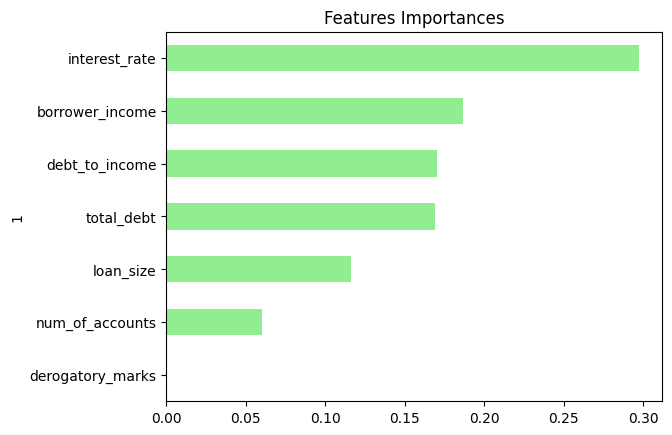

In [26]:
%matplotlib inline
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

Graph indicates that approximately Customer's borrowing capacity (income, debt to income and total debt) are critical Features (46%)

## Create a k-nearest neighbours Model with the Test and Train Data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = KNeighborsClassifier(n_neighbors=3)

In [28]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
cm_KNN = confusion_matrix(y_pred,y_test)
cm_df = pd.DataFrame(
    cm_KNN, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
acc_score = accuracy_score(y_pred,y_test)

In [31]:
target_names = ["Healthy Loan", "High-risk Loan"]
print("Confusion Matrix_k-Nearest Neighbours")
display(cm_df)
print('Accuracy Score: %.3f' % model.score(X_test, y_test))
print("Classification Report for k-Nearest Neighbours")
print(classification_report(y_pred,y_test, target_names=target_names))

Confusion Matrix_k-Nearest Neighbours


,Predicted 0,Predicted 1
Actual 0,18658,44
Actual 1,107,575


Accuracy Score: 0.992
Classification Report for k-Nearest Neighbours
                precision    recall  f1-score   support

  Healthy Loan       0.99      1.00      1.00     18702
High-risk Loan       0.93      0.84      0.88       682

      accuracy                           0.99     19384
     macro avg       0.96      0.92      0.94     19384
  weighted avg       0.99      0.99      0.99     19384
